In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Libraries imported')

Libraries imported


In [ ]:
import pandas as pd
df_long = pd.read_csv('/content/california_housing_train.csv')
display(df_long.head())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [ ]:

print('Shape:', df_long.shape)
print('Classes:', df_long['longitude'].unique())
df_long.describe()


Shape: (472, 9)
Classes: [-114.31 -114.47 -114.56 -114.57 -114.58 -114.59 -114.6  -114.61 -114.63
 -114.65 -114.66 -114.67 -114.68 -114.73 -114.94 -114.98 -115.22 -115.32
 -115.37 -115.38 -115.39 -115.4  -115.41 -115.46 -115.48 -115.49 -115.5
 -115.51 -115.52 -115.53 -115.54 -115.55 -115.56 -115.57 -115.58 -115.59
 -115.6  -115.62 -115.64 -115.69 -115.72 -115.73 -115.8  -115.84 -115.85
 -115.88 -115.9  -115.91 -115.93 -115.94 -115.95 -115.96 -115.98 -115.99
 -116.   -116.01 -116.02 -116.05 -116.06 -116.08 -116.09 -116.11 -116.12
 -116.14 -116.15 -116.16 -116.17 -116.18 -116.19 -116.2  -116.21 -116.22
 -116.23 -116.24 -116.25 -116.26 -116.27 -116.29 -116.3  -116.31 -116.32
 -116.33 -116.34 -116.35 -116.36 -116.37 -116.38 -116.39 -116.4  -116.41
 -116.42 -116.43 -116.44 -116.45 -116.46 -116.47 -116.48 -116.49 -116.5
 -116.51 -116.52 -116.53 -116.54 -116.55 -116.56 -116.57 -116.58 -116.6
 -116.61 -116.62 -116.66 -116.67 -116.68 -116.71 -116.72 -116.74 -116.75
 -116.76 -116.77 -116.78 -116

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,-116.330636,33.422097,19.252119,3365.207627,699.415254,1534.824153,543.440678,3.079986,121607.419492
std,0.649588,0.594010,8.689134,3017.334782,617.116083,1252.078856,453.792610,1.437850,71358.758058
min,-116.980000,32.560000,2.000000,42.000000,10.000000,9.000000,3.000000,0.499900,22500.000000
25%,-116.902500,32.820000,14.000000,1318.500000,284.000000,689.250000,244.750000,2.034175,68575.000000
50%,-116.495000,33.530000,18.000000,2544.000000,500.500000,1206.000000,437.000000,2.748650,97650.000000
75%,-115.907500,33.820000,24.000000,4239.500000,852.750000,2053.250000,703.500000,3.731800,156500.000000
max,-114.310000,36.000000,52.000000,19107.000000,3923.000000,7985.000000,2905.000000,10.294800,500001.000000


In [ ]:

X = df_long[['longitude','latitude']]
y = df_long['total_rooms']
y.head()

,total_rooms
0,5612
1,7650
2,720
3,1501
4,1454


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)


Training size: (330, 2)
Testing size: (142, 2)


In [ ]:

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Model trained')

Model trained


In [ ]:

y_pred = svm.predict(X_test)
list(y_pred)[:10]

[np.int64(1608),
 np.int64(1608),
 np.int64(1608),
 np.int64(2652),
 np.int64(2233),
 np.int64(2652),
 np.int64(2233),
 np.int64(1291),
 np.int64(1608),
 np.int64(1608)]

In [ ]:

results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
results.head(20)

,Actual,Predicted,Status
0,1879,1608,Wrong
1,1004,1608,Wrong
2,1087,1608,Wrong
3,1820,2652,Wrong
4,3369,2233,Wrong
5,3722,2652,Wrong
6,3895,2233,Wrong
7,1497,1291,Wrong
8,1134,1608,Wrong
9,2565,1608,Wrong


In [ ]:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.0

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

          44       0.00      0.00      0.00       1.0
          96       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
         149       0.00      0.00      0.00       1.0
         186       0.00      0.00      0.00       0.0
         197       0.00      0.00      0.00       1.0
         208       0.00      0.00      0.00       1.0
         260       0.00      0.00      0.00       1.0
         290       0.00      0.00      0.00       1.0
         350       0.00      0.00      0.00       1.0
         376       0.00      0.00      0.00       1.0
         452       0.00      0.00      0.00       0.0
         541       0.00      0.00      0.00       1.0
         553       0.00      0.00      0.00       1.0
         5

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


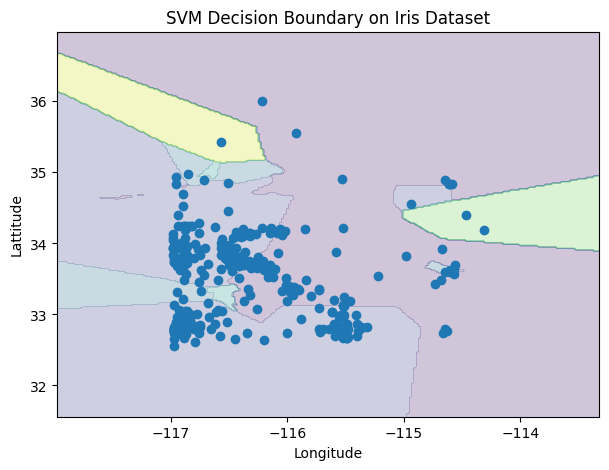

In [ ]:

x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('SVM Decision Boundary on Iris Dataset')
plt.show()

# Conclusion

In this program, we applied a Support Vector Machine (SVM) model on the California Housing dataset using longitude and latitude as input features. The objective was to predict total_rooms, but the SVM classifier produced 0% accuracy, showing that the model did not perform well for this task.